In [46]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.batchrunner import BatchRunner
%matplotlib inline
import matplotlib.pyplot as plt
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import itertools

class FoodAgent(Agent):
    def __init__(self,unique_id,model,boja,ukus,oblik):
        super().__init__(unique_id,model)
        self.boja = boja
        self.oblik = oblik
        self.ukus = ukus
        
   #pogledaj github
#1 imamo razne hrane,otrovne itd, i uci agenti o svetu dok staje i stavljaj
#ne reaguje na agente
#2 cuvamo kombinacije + donosimo odluke + modifikujemo memoriju + weights za random odluke
# pokazati da li su bolji u donosenju odluke kako vreme prolazi
## a) da li znam kombinaciju - sta da radim sa njom
## b) da li

#Boje : plava,zelena,crvena,zuta
#Mirisi: 1,2,3,4
#Ukusi : kiselo,slatko,ljuto,gorko
#oblici : zvezda, kvadrat, trougao, krug


#ako imamo 10X10 tablu, imamo ukupno 64 kombinacije
boje = ["red","yellow","green","blue"]
ukusi = ["kiselo","ljuto","gorko","slatko"]
oblici = ["zvezda","kvadrat","krug","trougao"]
sve_kombinacije = list(itertools.product(boje,ukusi,oblici))
assert(len(sve_kombinacije)==64)



class HungryAgent(Agent):
    def __init__(self,unique_id,model):
        super().__init__(unique_id,model)
        #self.energy = 0
        self.knowledge = 0
        self.svet = {"boje":set(),"oblici":set(),"ukusi":set()}
        #self.wealth = 1
        #self.dlakav = dlakav
        
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos,moore=True,include_center = False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self,new_position)
        
    def store_info(self,food):
        self.svet["boje"].add(food.boja)
        self.svet["oblici"].add(food.oblik)
        self.svet["ukusi"].add(food.ukus)
        k = 0
        for key,value in self.svet.items():
            assert(len(value)<=4)
            k+=len(value)
        self.knowledge = k
        
        
        
    def explore(self):
        """Ide negde i gleda na sta je nagazio"""
        foods = [f for f in self.model.grid.get_cell_list_contents([self.pos]) if isinstance(f,FoodAgent)]
        for food in foods:
            self.store_info(food)



        
    def step(self):
       # print (self.unique_id)
       # print("Imam:%s dinara" %self.wealth)
        self.move()
        self.explore()
        #moze da komunicira sa okruzenjem i da saznaje o drugim bicima
        

def compute_knowledge(model):
    """Ukupno znanje svih HungryAgenata"""
    agenti = model.schedule.agents
    ukupno = 0
    for agent in  [a for a  in agenti if isinstance(a,HungryAgent)]:
        ukupno+=agent.knowledge
    return ukupno
    
        
    
class OrganismModel(Model):
    """A model with some number of agents."""
    def __init__(self,N,width,height,num_of_food=64):
        self.num_agents = N
        self.num_food = num_of_food
        self.grid = MultiGrid(width,height,True)
        self.schedule= RandomActivation(self)
        self.running = True
        for i in range(self.num_agents):
            a = HungryAgent(i,self)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a,(x,y))
            
        for i in range(self.num_food):
            kombinacija = sve_kombinacije[i]
            id_offset = i+1000
            f = FoodAgent(id_offset,self, kombinacija[0],kombinacija[1],kombinacija[2])
            #self.schedule.add(f)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(f,(x,y))
            
            
        self.datacollector = DataCollector(
        model_reporters = {"Total_Knowledge":compute_knowledge}) #prosledice automacki
  #      agent_reporters = {"Knowledge":"knowledge"})
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [47]:
model  = OrganismModel(20,10,10)

for i in range(100):
    model.step()
    
model.datacollector.get_model_vars_dataframe()

{'zuta'}
{'trougao'}
{'slatko'}
3
{'zuta'}
{'kvadrat'}
{'kiselo'}
3
{'zelena'}
{'kvadrat'}
{'gorko'}
3
{'plava'}
{'trougao'}
{'slatko'}
3
{'plava'}
{'krug'}
{'gorko'}
3
{'plava', 'zuta'}
{'krug', 'trougao'}
{'kiselo', 'gorko'}
6
{'plava'}
{'zvezda'}
{'gorko'}
3
{'crvena'}
{'kvadrat'}
{'gorko'}
3
{'zuta'}
{'krug'}
{'gorko'}
3
{'zuta', 'crvena'}
{'krug'}
{'gorko', 'slatko'}
5
{'crvena'}
{'kvadrat'}
{'gorko'}
3
{'crvena'}
{'krug'}
{'ljuto'}
3
{'zuta', 'zelena'}
{'kvadrat'}
{'kiselo', 'gorko'}
5
{'zelena'}
{'krug'}
{'gorko'}
3
{'zuta'}
{'trougao'}
{'slatko'}
3
{'plava'}
{'kvadrat'}
{'kiselo'}
3
{'plava'}
{'kvadrat'}
{'kiselo'}
3
{'crvena'}
{'zvezda'}
{'slatko'}
3
{'plava', 'crvena'}
{'kvadrat'}
{'gorko', 'slatko'}
5
{'plava'}
{'trougao'}
{'slatko'}
3
{'plava', 'zuta'}
{'trougao', 'kvadrat'}
{'ljuto', 'slatko'}
6
{'plava', 'zuta', 'crvena'}
{'trougao', 'kvadrat', 'zvezda'}
{'gorko', 'ljuto', 'slatko'}
9
{'zuta'}
{'trougao'}
{'slatko'}
3
{'zuta'}
{'zvezda'}
{'ljuto'}
3
{'zuta', 'zelena'}
{'z

12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'crvena', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zuta', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zuta', 'zelena'}
{'krug', 'trougao', 'kvadrat'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
11
{'plava', 'zuta', 'crvena', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zelena', 'zuta'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zelena', 'zuta'}
{

12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zuta', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zuta', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zuta', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'crvena', 'zelena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'zelena', 'crvena'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'crvena', 'zelena', 'zuta'}
{'krug', 'trougao', 'kvadrat', 'zvezda'}
{'kiselo', 'gorko', 'ljuto', 'slatko'}
12
{'plava', 'zuta', 'crvena', '

,Total_Knowledge
0,0
1,32
2,57
3,89
4,96
5,111
6,131
7,136
8,145
9,153


In [ ]:
#residue
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates)>1:
            other=self.random.choice(cellmates)
            self.wealth-=1
            other.wealth+=1

In [55]:
from MoneyModel import *
from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer

def agent_portrayal(agent):
    portrayal= {"Shape":"circle",
                "Filled":"true",
                "Layer":0,
                "Color":"red",
                "r":0.5
                 }
    return portrayal

grid = CanvasGrid(agent_portrayal,10,10,500,500)
server = ModularServer(MoneyModel,[grid],"Money Model",
                      {"N":100,"width":10,"height":10})
server.port = 8521
server.launch()

ModuleNotFoundError: No module named 'MoneyModel'

In [51]:
fixed_params = {
    "width": 10,
    "height": 10
}

variable_params = {"N": range (10,500,10)}

batch_run = BatchRunner(
    MoneyModel,
    variable_params,
    fixed_params,
    iterations = 5, #5 puta ce za svaku kombinaciju 100 koraka
    max_steps = 100,
    model_reporters = {"Gini":compute_gine}
)

batch_run.run_all()
    


245it [01:43,  2.36it/s]


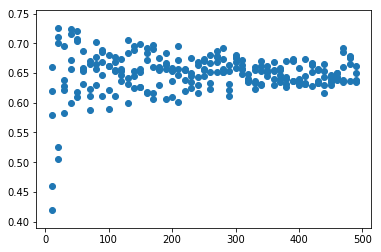

In [54]:
run_data = batch_run.get_model_vars_dataframe()
run_data
plt.scatter(run_data.N,run_data.Gini)

In [36]:
model  = MoneyModel(50,10,10)
for i in range(100):
    model.step()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
     5             1
     6             1
     7             1
     8             1
     9             1
     10            1
     11            1
     12            1
     13            1
     14            1
     15            1
     16            1
     17            1
     18            1
     19            1
     20            1
     21            1
     22            1
     23            1
     24            1
     25            1
     26            1
     27            1
     28            1
     29            1
...              ...
99   20            0
     21            0
     22            1
     23            0
     24            1
     25            2
     26            1
     27            1
     28            1
     29            0
     30            1
     31            0
     32            1
     33            4
     34            0
     35            0
     36            0
     37            0
     38            3
     39            2
     40            0
     41            1
     42            0
     43            1
     44            5
     45            0
     46            3
     47            2
     48            0
     49            0

[5000 rows x 1 columns]

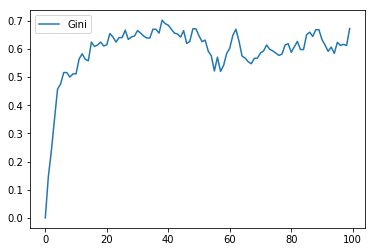

In [39]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()
agw = model.datacollector.get_agent_vars_dataframe()
agw

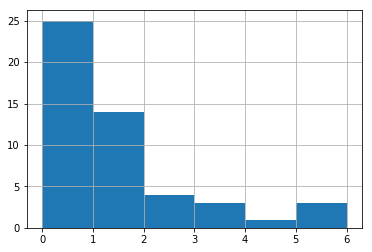

In [44]:
end_wealth = agw.xs(99,level="Step")["Wealth"]
end_wealth.hist(bins = range(agw.Wealth.max()+1))



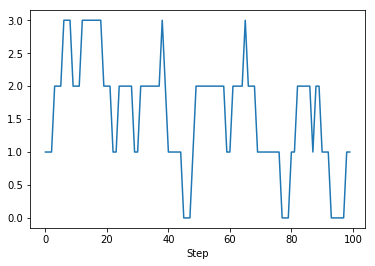

In [46]:
one_agent_wealth = agw.xs(14,level="AgentID")
one_agent_wealth.Wealth.plot()

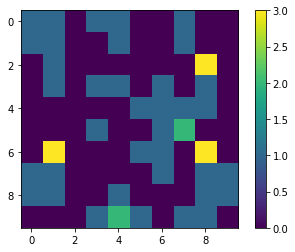

In [27]:
import numpy as np
agent_counts = np.zeros((model.grid.width,model.grid.height))

for cell in model.grid.coord_iter():
    cell_content,x,y = cell
    agent_count = len(cell_content)
    agent_counts[x][y]=agent_count
    
plt.imshow(agent_counts)
plt.colorbar()

[0, 3, 1, 1, 1, 0, 0, 2, 0, 2]


(array([419., 314., 167.,  62.,  26.,  12.]),
 array([0, 1, 2, 3, 4, 5, 6]),
 <a list of 6 Patch objects>)

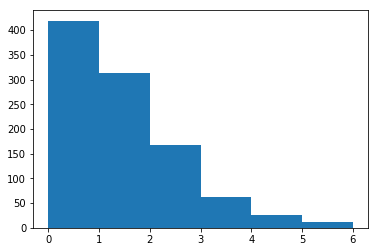

In [10]:
all_wealth=[]
for j in range(100):
    model = MoneyModel(10)
    
    for i in range(10):
        model.step()
    
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)
print (agent_wealth)
plt.hist(all_wealth, bins=range(max(all_wealth)+1))
    